# Drugs@FDA Analysis

Here's some analysis of the data scraped from (the now defunct) Drugs@FDA

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib

df = pd.read_csv('masterDrugList2.csv')

The raw data that was scraped looks like this:

In [3]:
df

,statReviewAvailable,PPAReviewAvailable,Name,appType,PPAReviewLink,Company,reviewAvailable,marketStat,appNo,approvDate,reviewPageLink,sumReviewAvailable,PatientPopulationAltered,medReviewAvailable
0,True,False,AZULFIDINE EN-TABS,NDA,-,PHARMACIA UPJOHN,True,Prescription,21243,2000-08-18,http://www.accessdata.fda.gov/drugsatfda_docs/...,False,False,True
1,True,False,BYVALSON,NDA,-,FOREST LABS LLC,True,Prescription,206302,2016-06-03,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
2,-,False,AZULFIDINE EN-TABS,NDA,-,PHARMACIA AND UPJOHN,False,Prescription,7073,1950-06-20,-,-,False,-
3,True,False,BYSTOLIC,NDA,-,FOREST LABS,True,Prescription,21742,2007-12-17,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
4,True,False,BYETTA,NDA,-,AMYLIN,True,Prescription,21919,2009-10-30,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
5,True,False,BYETTA,NDA,-,ASTRAZENECA AB,True,Prescription,21773,2005-04-28,http://www.accessdata.fda.gov/drugsatfda_docs/...,False,False,True
6,True,False,BYDUREON PEN,NDA,-,ASTRAZENECA AB,True,Prescription,22200,2012-01-27,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
7,-,-,BUTORPHANOL TARTRATE PRESERVATIVE FREE,-,-,-,-,Discontinued,74620,-,-,-,-,-
8,-,-,BUTORPHANOL TARTRATE PRESERVATIVE FREE,-,-,-,-,Discontinued,75170,-,-,-,-,-
9,-,-,BUTORPHANOL TARTRATE PRESERVATIVE FREE,-,-,-,-,Discontinued,75695,-,-,-,-,-


In [4]:
df.Name.count()

22307

Some top-level statistics on all **22,307** products reveal that a large proportion are in fact discontinued:

In [5]:
df.groupby(df.marketStat).marketStat.count()

marketStat
Discontinued                 10793
None (Tentative Approval)      648
Over-the-counter               559
Prescription                 10307
Name: marketStat, dtype: int64

We're *really* interested in the drugs which aren't **ANDAs** and don't have marketing status labelled as '**Discontinued**' or '**None (Tentative Approval)**':

In [6]:
iDs = df[(df.marketStat != 'Discontinued') & (df.appType != 'ANDA') & (df.appType != 'None (Tentative Approval)')] #interest drugs
iDs.date = pd.to_datetime(iDs.approvDate[iDs.approvDate != '-'])
iDs

,statReviewAvailable,PPAReviewAvailable,Name,appType,PPAReviewLink,Company,reviewAvailable,marketStat,appNo,approvDate,reviewPageLink,sumReviewAvailable,PatientPopulationAltered,medReviewAvailable
0,True,False,AZULFIDINE EN-TABS,NDA,-,PHARMACIA UPJOHN,True,Prescription,21243,2000-08-18,http://www.accessdata.fda.gov/drugsatfda_docs/...,False,False,True
1,True,False,BYVALSON,NDA,-,FOREST LABS LLC,True,Prescription,206302,2016-06-03,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
2,-,False,AZULFIDINE EN-TABS,NDA,-,PHARMACIA AND UPJOHN,False,Prescription,7073,1950-06-20,-,-,False,-
3,True,False,BYSTOLIC,NDA,-,FOREST LABS,True,Prescription,21742,2007-12-17,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
4,True,False,BYETTA,NDA,-,AMYLIN,True,Prescription,21919,2009-10-30,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
5,True,False,BYETTA,NDA,-,ASTRAZENECA AB,True,Prescription,21773,2005-04-28,http://www.accessdata.fda.gov/drugsatfda_docs/...,False,False,True
6,True,False,BYDUREON PEN,NDA,-,ASTRAZENECA AB,True,Prescription,22200,2012-01-27,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
12,True,False,BUTRANS,NDA,-,PURDUE PHARMA LP,True,Prescription,21306,2010-06-30,http://www.accessdata.fda.gov/drugsatfda_docs/...,True,False,True
107,True,False,BUSULFEX,NDA,-,OTSUKA PHARM,True,Prescription,20954,1999-02-04,http://www.accessdata.fda.gov/drugsatfda_docs/...,False,False,True
179,-,False,BUPRENEX,NDA,-,NORWICH-EATON PHARMA,False,Prescription,18410,1981-12-29,-,-,False,-


This leaves us with 3217 relevant drugs:

In [7]:
iDs.Name.count()

3217

# Review Availability Analysis

In [8]:
propRevAv = float(iDs[iDs.reviewAvailable == 'True'].reviewAvailable.count())/float(iDs.reviewAvailable.count())
propPPAAv = float(iDs[(iDs.PatientPopulationAltered == 'True') & (iDs.PPAReviewAvailable == 'True')].reviewAvailable.count())/float(iDs[iDs.PatientPopulationAltered == 'True'].PatientPopulationAltered.count())
propMedRevAv = float(iDs[iDs.medReviewAvailable == 'True'].medReviewAvailable.count())/float(iDs.medReviewAvailable.count())
propStatRevAv = float(iDs[iDs.statReviewAvailable == 'True'].statReviewAvailable.count())/float(iDs.statReviewAvailable.count())
propSumRevAv = float(iDs[iDs.sumReviewAvailable == 'True'].sumReviewAvailable.count())/float(iDs.sumReviewAvailable.count())

summaryTable = pd.DataFrame([pd.Series(['Main Reviews','PPA Reviews','Medical Reviews','Statistical Reviews','Summary Reviews']),pd.Series([propRevAv,propPPAAv,propMedRevAv,propStatRevAv,propSumRevAv])]).T
summaryTable.columns = ['Review Type','Proportion Available']
summaryTable

,Review Type,Proportion Available
0,Main Reviews,0.437053
1,PPA Reviews,0.149533
2,Medical Reviews,0.423998
3,Statistical Reviews,0.340068
4,Summary Reviews,0.223189


A **Main Review** is the link produced at the approval stage which takes you to a list of all the documents (such as [this](http://www.accessdata.fda.gov/drugsatfda_docs/nda/2007/021742s000TOC.cfm
) one for example). This page contains subsequent links to a number of separate reviews such as: **Medical**, **Statistical** and **Summary**. The **PPA Reviews** refer to the review page released when a company applies for a **Patient Population Alteration**.

One can group the companies by number of unavailable reviews:

In [9]:
compUnavRev = iDs[iDs.reviewAvailable != 'True'].reviewAvailable.groupby(iDs.Company).count()
compUnavRev.name = 'No. of unavailable reviews'
compAvRev = iDs[iDs.reviewAvailable == 'True'].reviewAvailable.groupby(iDs.Company).count()
compAvRev.name = 'No. of available reviews'
companies = pd.concat([compUnavRev,compAvRev],axis=1).sort_values(by='No. of unavailable reviews',ascending=False).fillna(0)
companies

,No. of unavailable reviews,No. of available reviews
HOSPIRA,165.0,6.0
BAXTER HLTHCARE,150.0,9.0
B BRAUN,126.0,4.0
PHARMACIA AND UPJOHN,45.0,10.0
PFIZER,42.0,26.0
JANSSEN PHARMS,28.0,21.0
NOVARTIS,27.0,37.0
FRESENIUS KABI USA,26.0,10.0
GE HEALTHCARE,24.0,2.0
BRACCO,23.0,4.0


We will see later that the main correlation here is in fact with the Approval Date of the product.

## Review Availability by Approval Date

As a general overview, here's the number of approved applications (from our previously defined subset) grouped by year: 

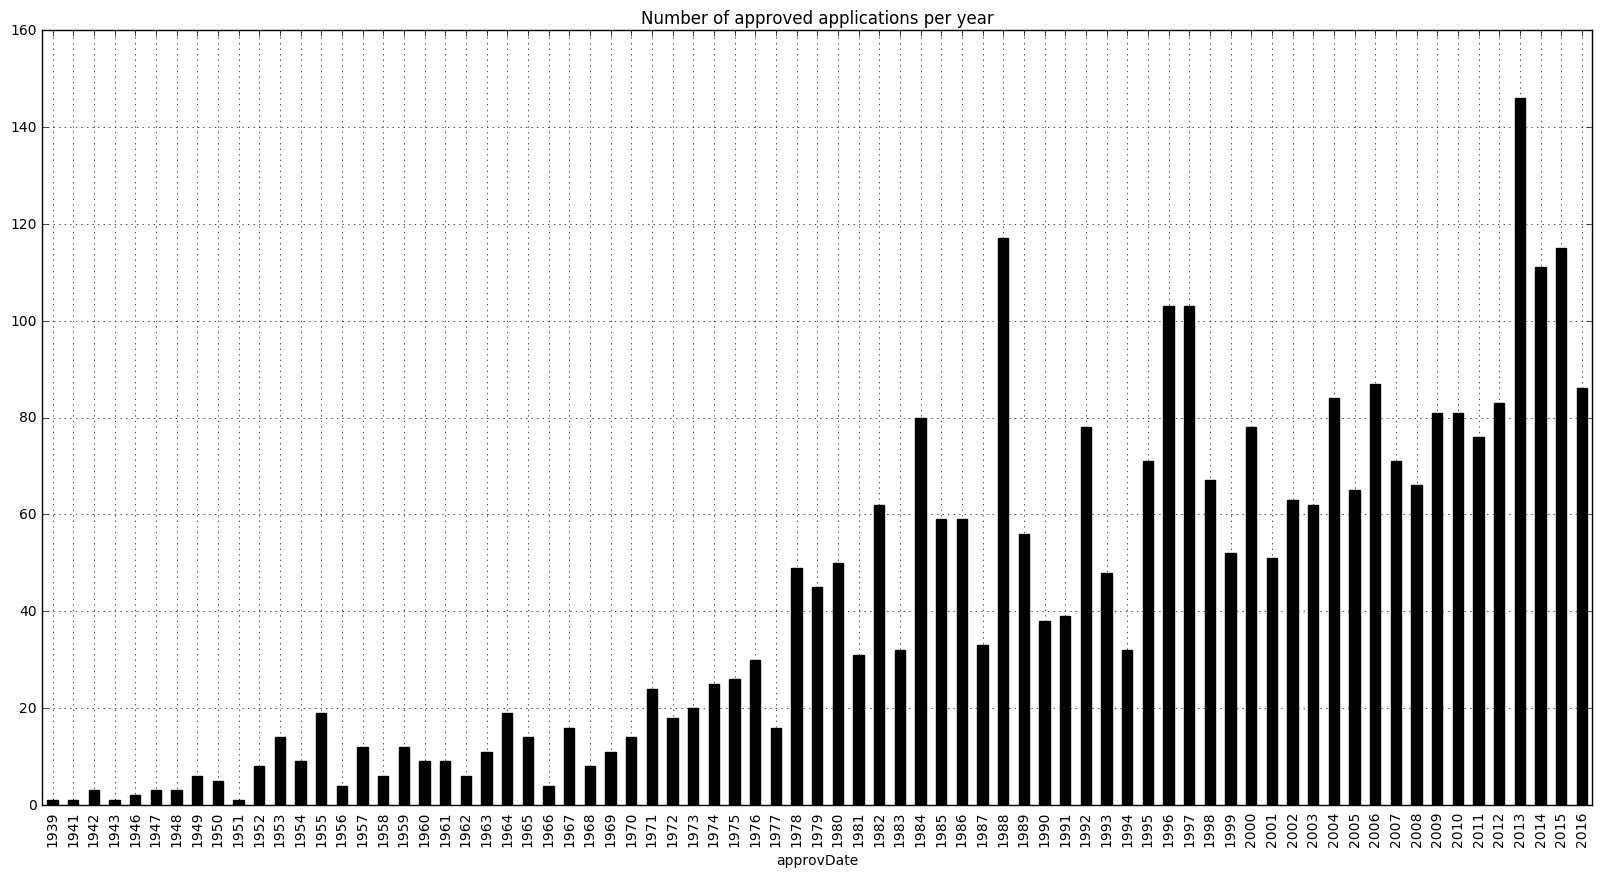

In [35]:
count = iDs.date.groupby(iDs.date.dt.year).count()
count.plot(kind="bar",figsize=(20,10),grid=True, title='Number of approved applications per year', color='k')

We can plot a histogram of the proportion of Main Reviews that are available from every approved application per year:

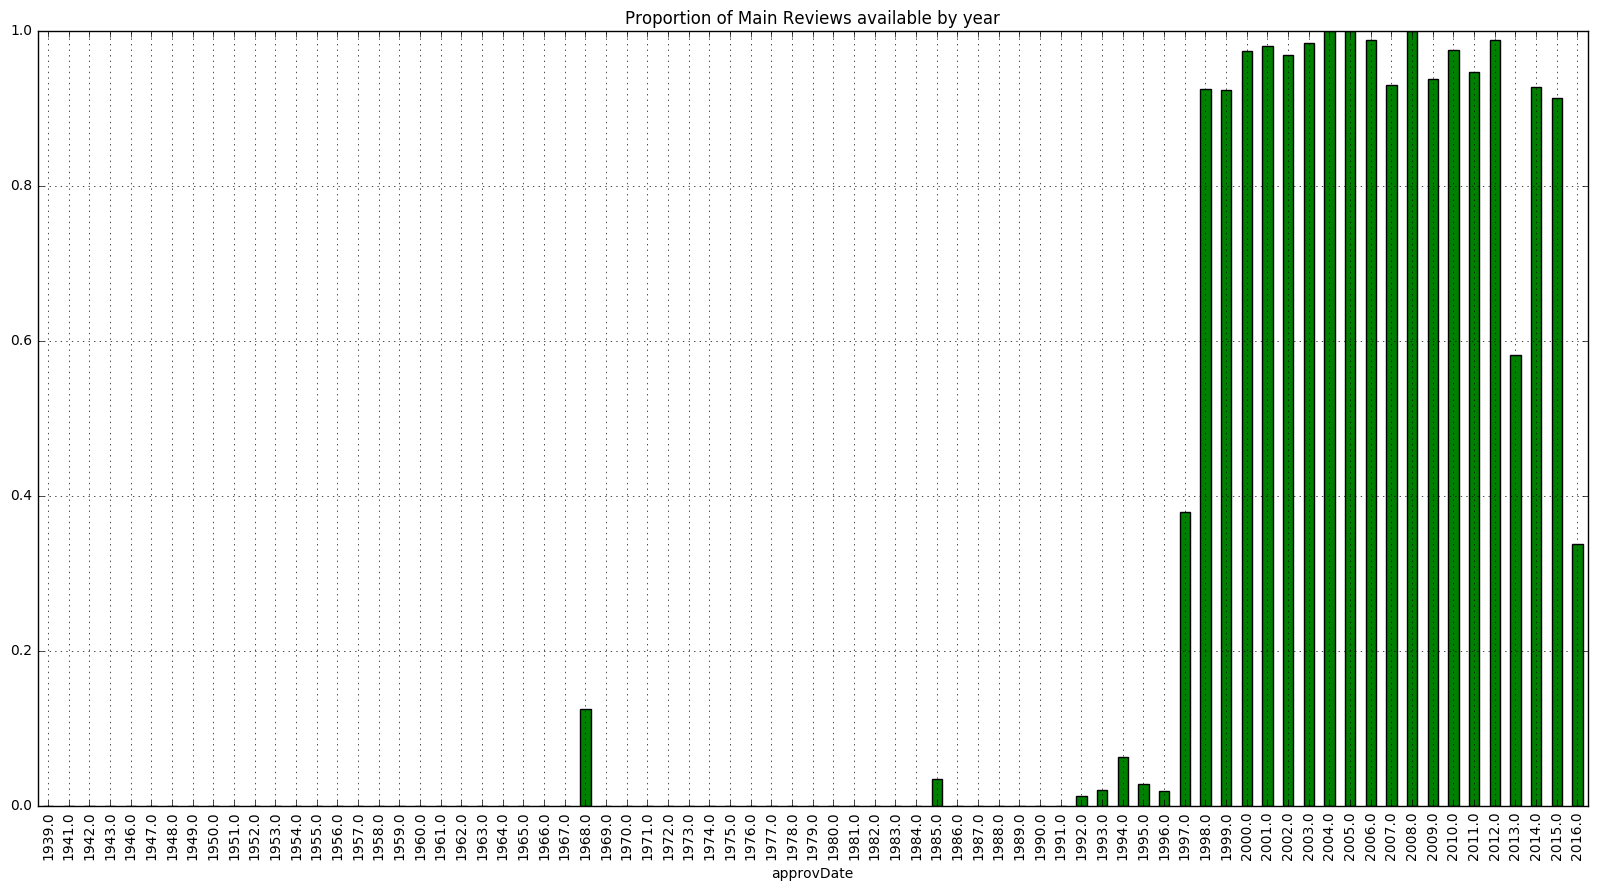

In [36]:
iDs.propRevAv_yr = iDs[iDs.reviewAvailable == 'True'].reviewAvailable.groupby(iDs.date.dt.year).count()/iDs.reviewAvailable.groupby(iDs.date.dt.year).count()
iDs.propRevAv_yr = iDs.propRevAv_yr.fillna(0) #changes NaN values to 0
iDs.propRevAv_yr.plot(kind="bar",figsize=(20,10),grid=True, title='Proportion of Main Reviews available by year', color='g')

The sharp rise here presumably coincides with the transferral of the FDA's database to the current digital platform. We can now make further plots for each type of review, the Medical Review  seems to follow a similar trend:

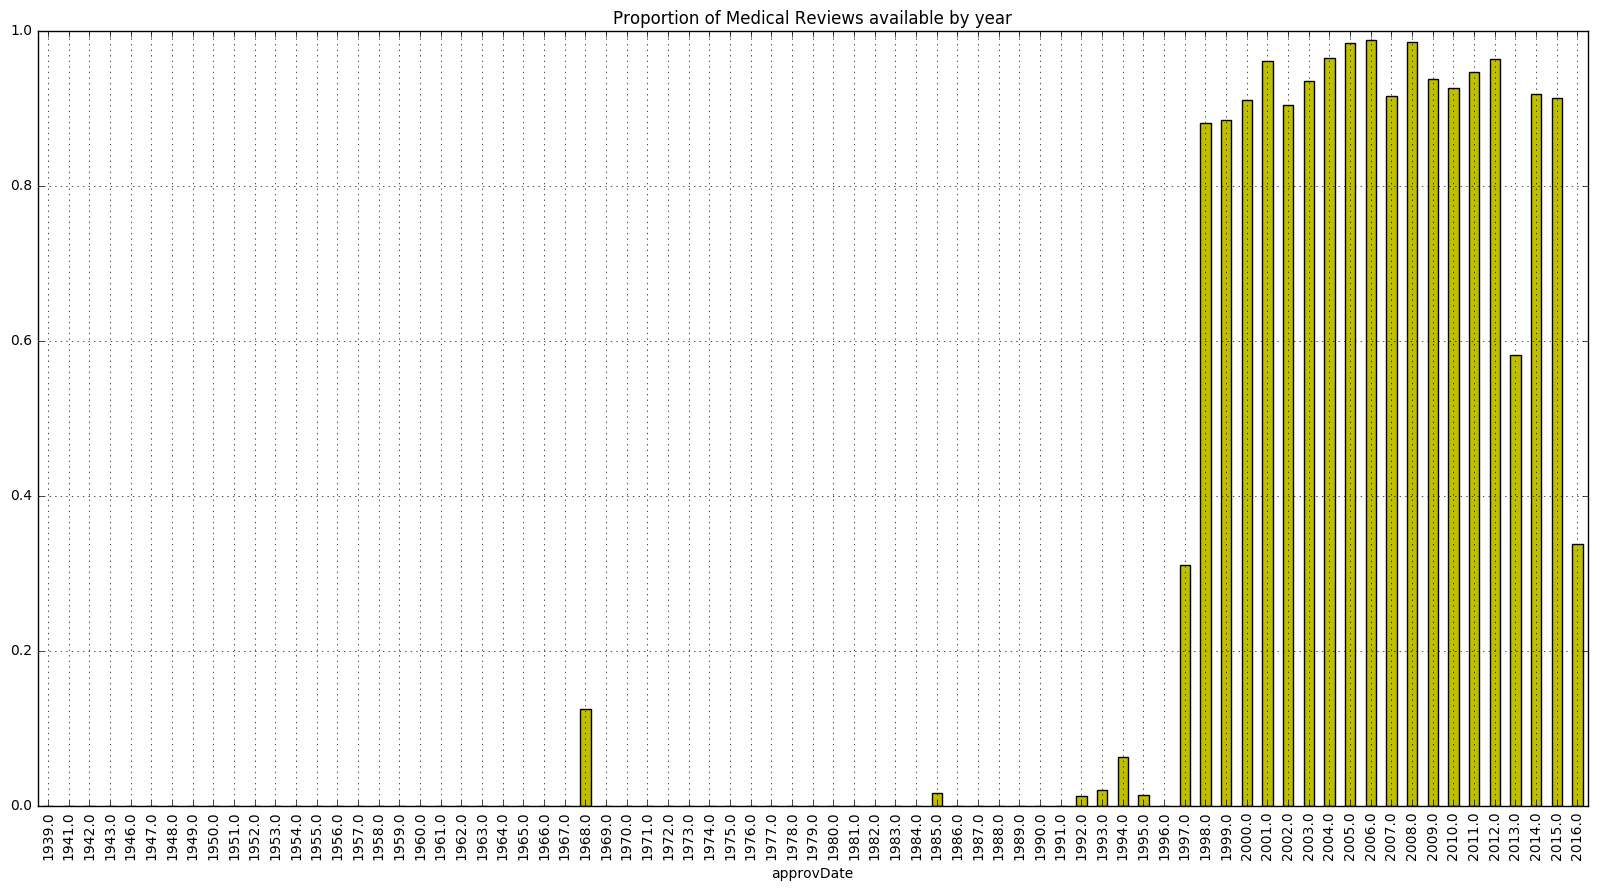

In [40]:
iDs.propMedRevAv_yr = iDs[iDs.medReviewAvailable == 'True'].medReviewAvailable.groupby(iDs.date.dt.year).count()/iDs.medReviewAvailable.groupby(iDs.date.dt.year).count()
iDs.propMedRevAv_yr = iDs.propMedRevAv_yr.fillna(0) #changes NaN values to 0
iDs.propMedRevAv_yr.plot(kind="bar",figsize=(20,10),grid=True, title='Proportion of Medical Reviews available by year', color='y')

There are fewer Statistical reviews as we have seen:

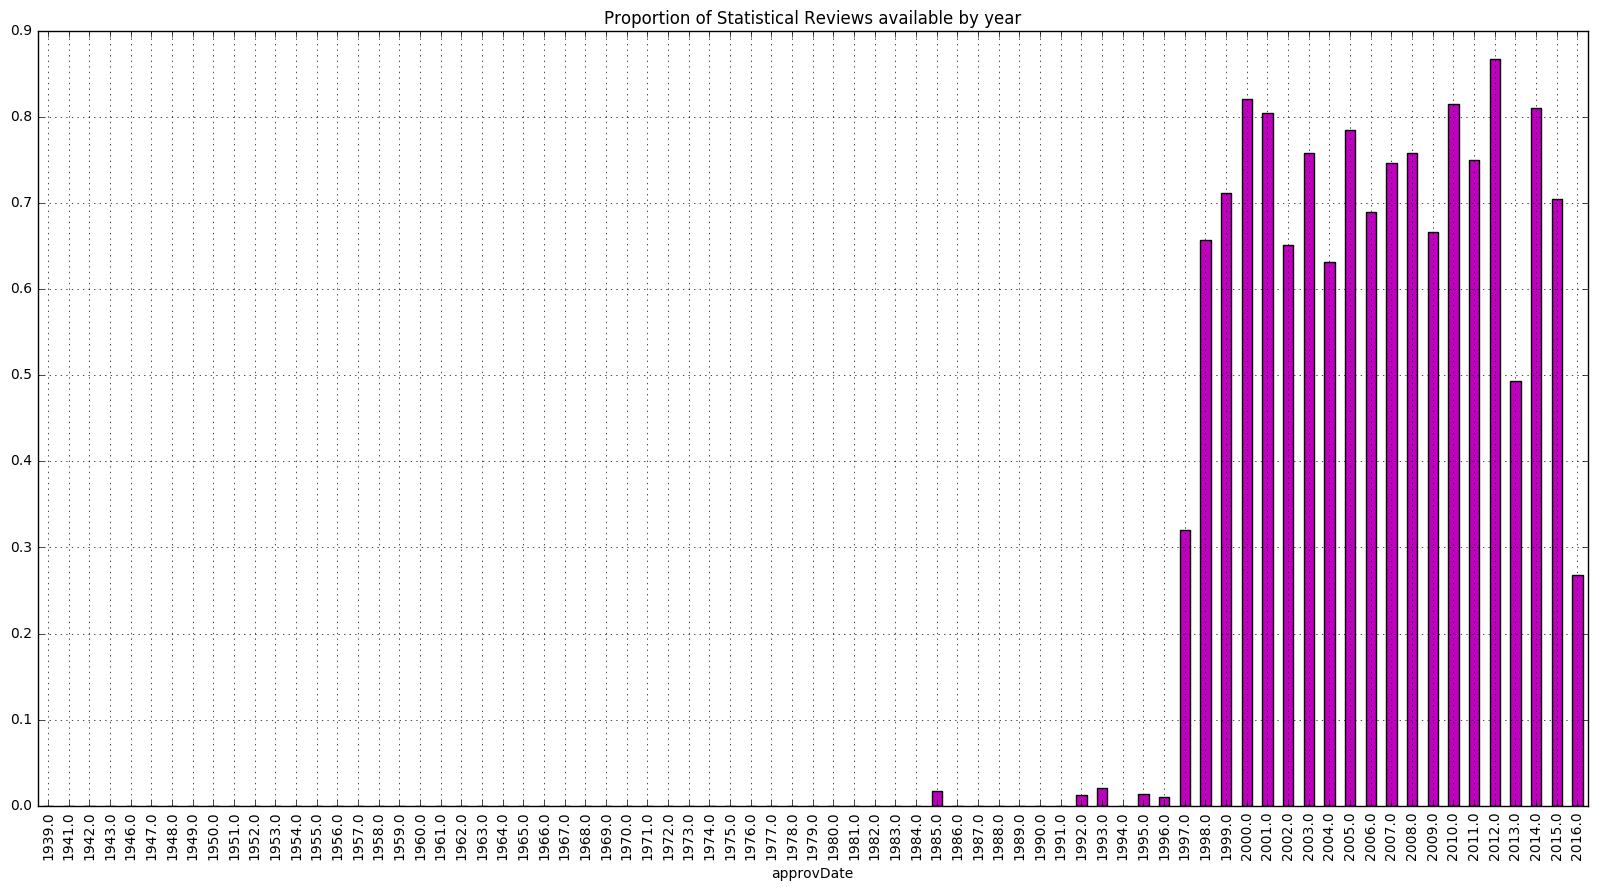

In [38]:
iDs.propStatRevAv_yr = iDs[iDs.statReviewAvailable == 'True'].statReviewAvailable.groupby(iDs.date.dt.year).count()/iDs.statReviewAvailable.groupby(iDs.date.dt.year).count()
iDs.propStatRevAv_yr = iDs.propStatRevAv_yr.fillna(0) #changes NaN values to 0
iDs.propStatRevAv_yr.plot(kind="bar",figsize=(20,10),grid=True, title='Proportion of Statistical Reviews available by year',color='m')

It is interesting to see that the Summary reviews only really started to appear in the mid-2000s:

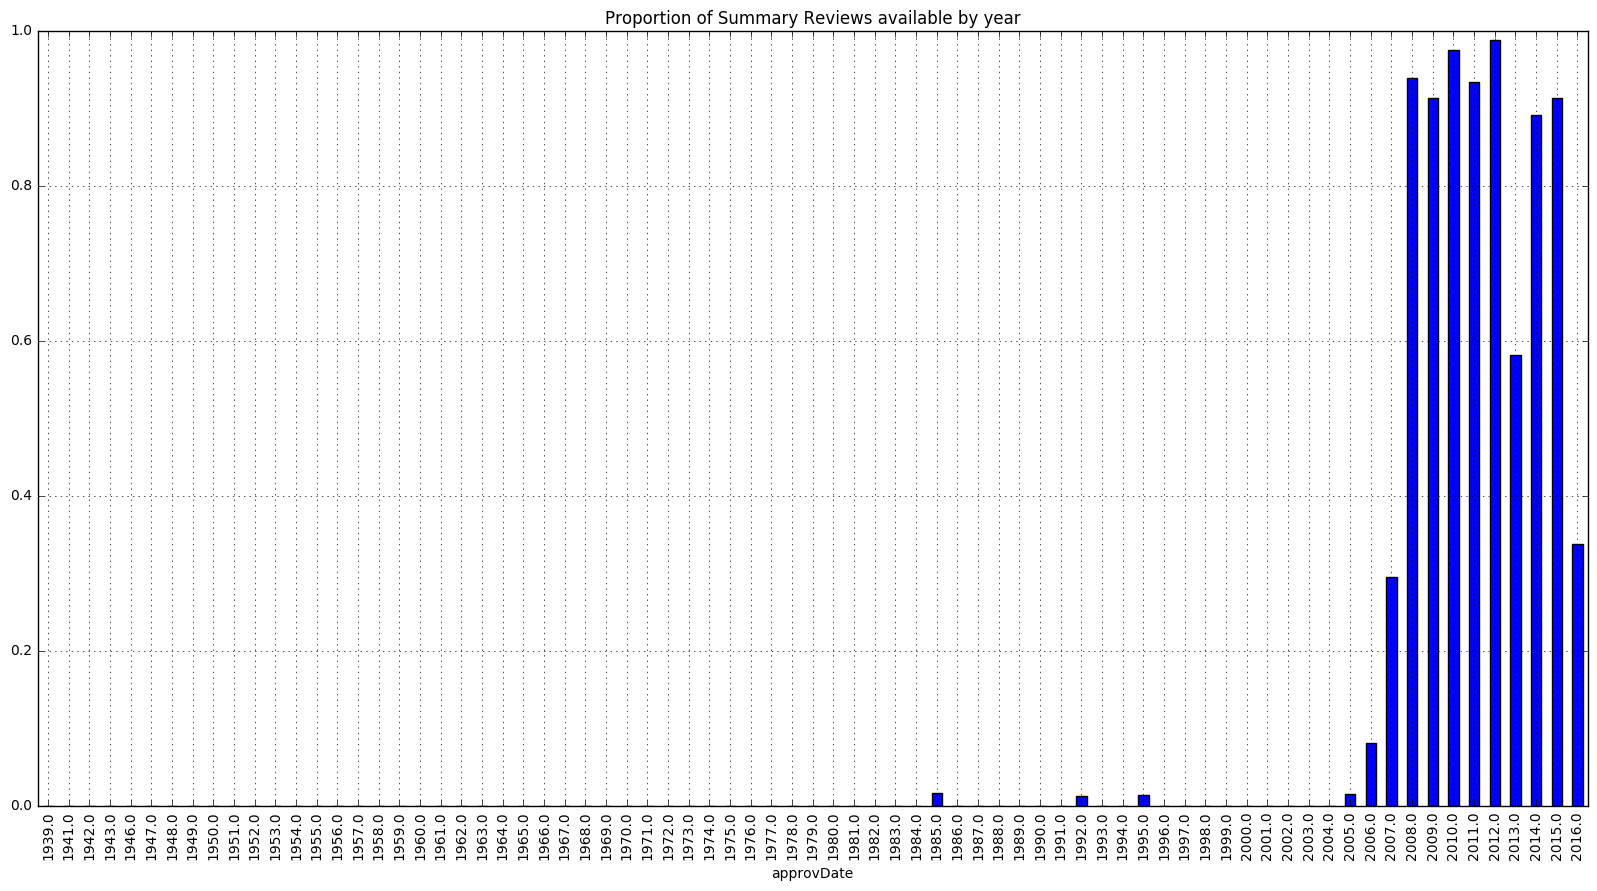

In [24]:
iDs.propSumRevAv_yr = iDs[iDs.sumReviewAvailable == 'True'].sumReviewAvailable.groupby(iDs.date.dt.year).count()/iDs.sumReviewAvailable.groupby(iDs.date.dt.year).count()
iDs.propSumRevAv_yr = iDs.propSumRevAv_yr.fillna(0) #changes NaN values to 0
iDs.propSumRevAv_yr.plot(kind="bar",figsize=(20,10),grid=True, title='Proportion of Summary Reviews available by year')

For the 'Patient Population Altered' Main Reviews:

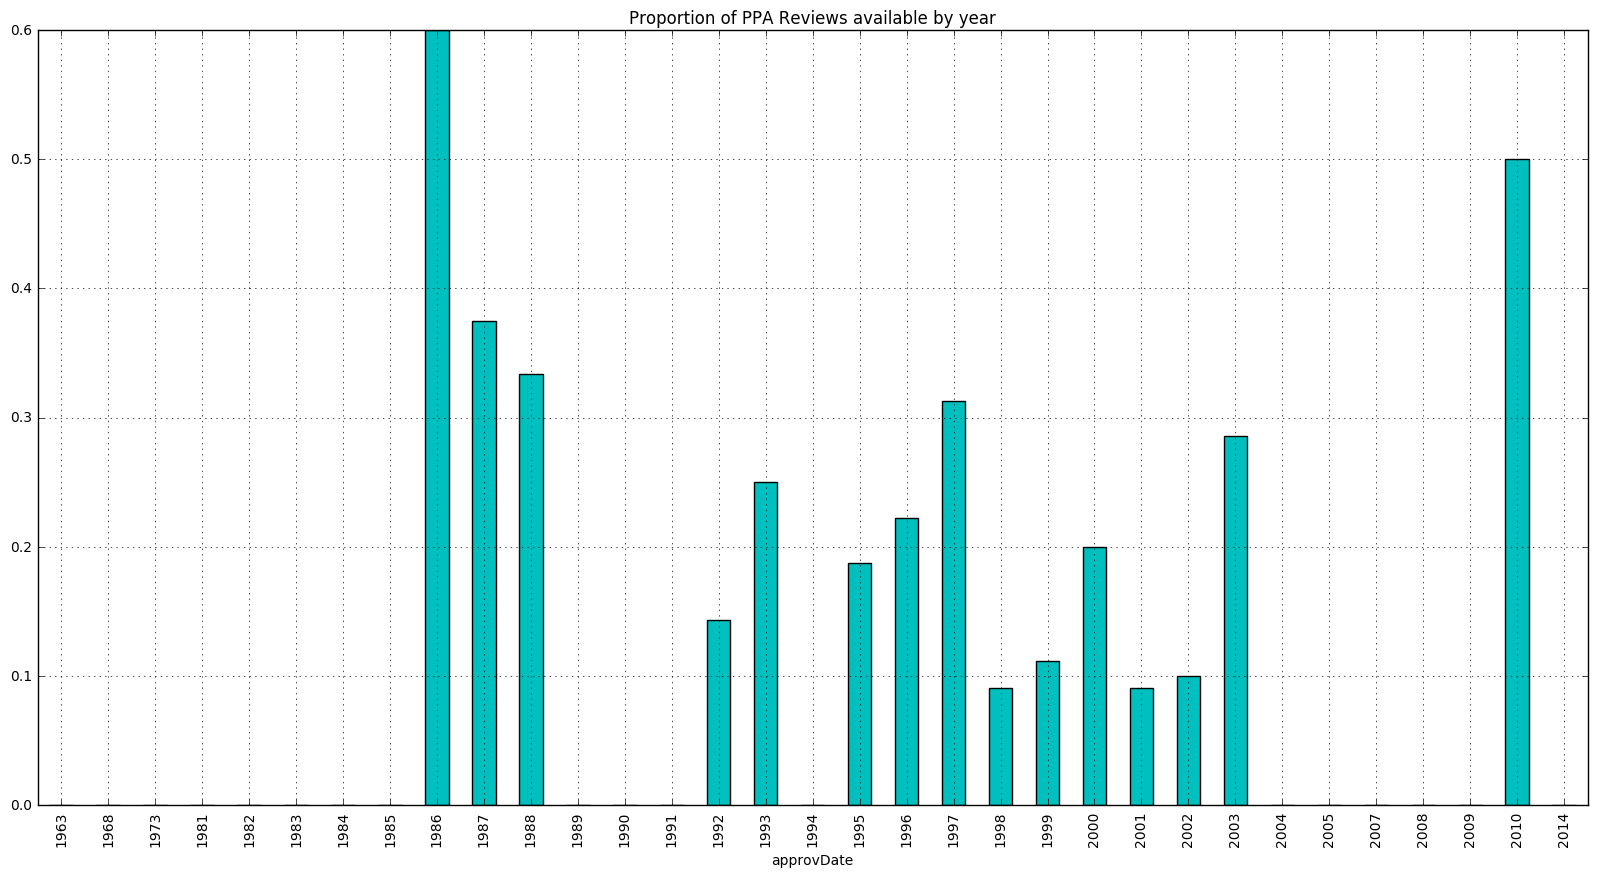

In [39]:
iDs.propPPAAv_yr = iDs[(iDs.PatientPopulationAltered == 'True') & (iDs.PPAReviewAvailable == 'True')].PPAReviewAvailable.groupby(iDs.date.dt.year).count()/(iDs[iDs.PatientPopulationAltered == 'True'].PPAReviewAvailable.groupby(iDs.date.dt.year).count())
iDs.propPPAAv_yr = iDs.propPPAAv_yr.fillna(0) #changes NaN values to 0
iDs.propPPAAv_yr.plot(kind="bar",figsize=(20,10),grid=True, title='Proportion of PPA Reviews available by year',color='c')